<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_218263393_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 218263393
period = 13.5830231502016  # Orbital period in days
epoch = 1640.7910612528
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.7]
folded_lc = folded_lc[folded_lc.time > -0.7]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_218263393_all_sector_lightcurve.csv


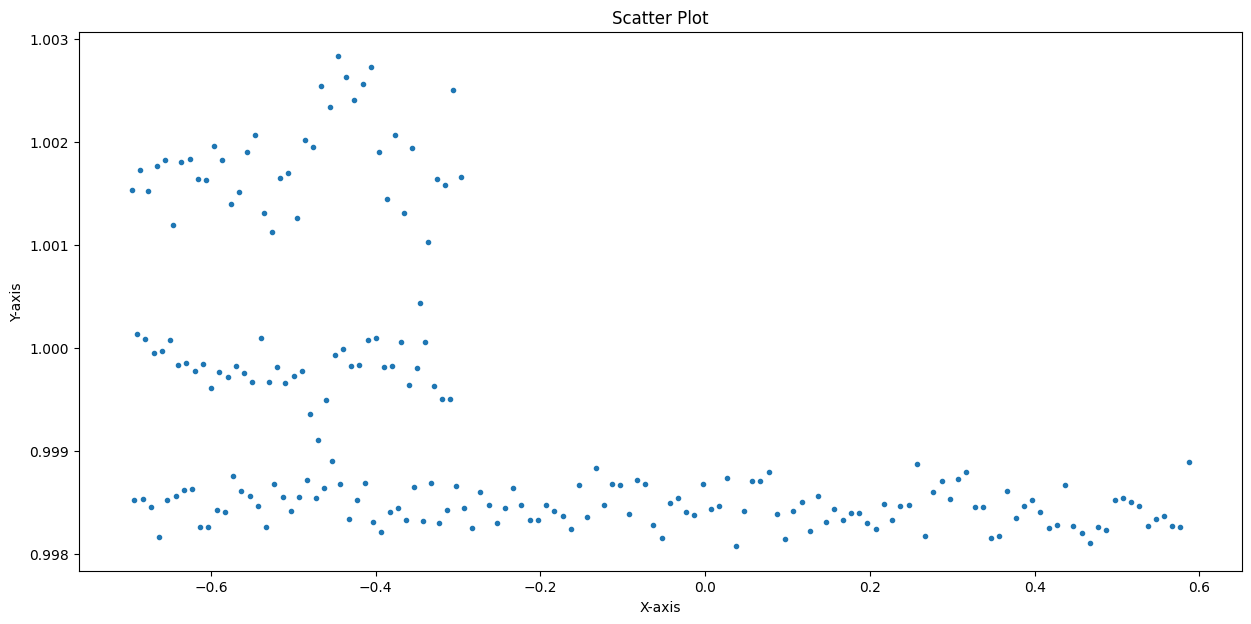

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([12, 39])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-7-df91f56492a9>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_12, ap_39])


Sector 12


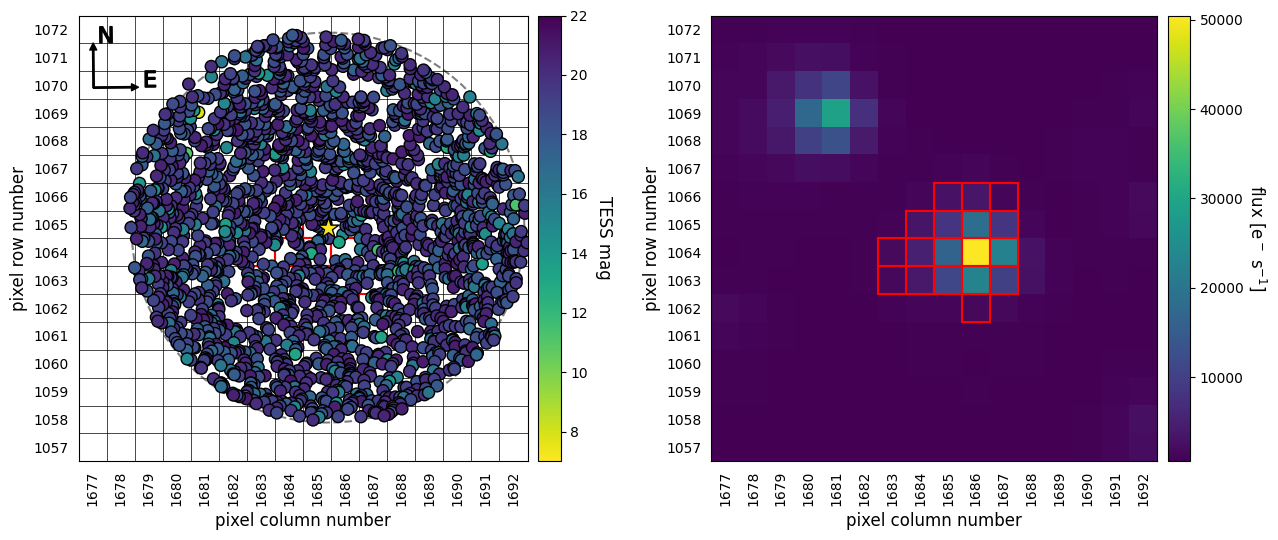

Sector 39


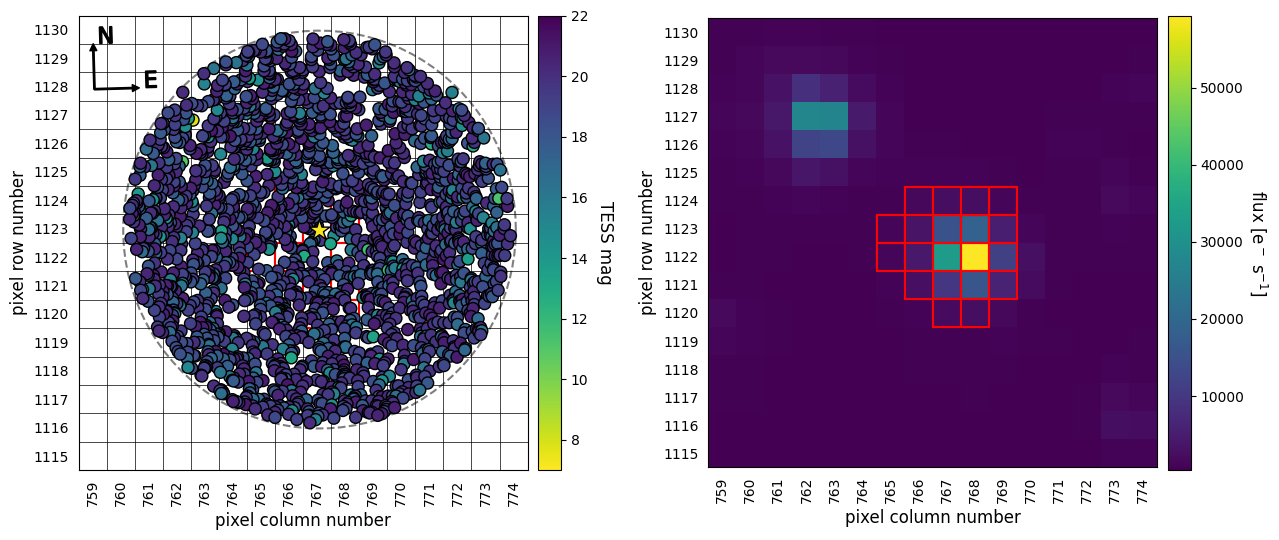

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,218263393,7.15787,5.711,5.154,4.855,262.166440,-46.895193,0.35109,0.364630,3451.0,219.801000,0.000,0.000
1,1523281822,19.71190,NaN,NaN,NaN,262.165854,-46.894451,NaN,NaN,NaN,NaN,3.034,331.651
2,1523281793,18.55440,NaN,NaN,NaN,262.164192,-46.894597,NaN,NaN,NaN,0.083483,5.931,291.198
3,1523281792,18.62010,NaN,NaN,NaN,262.163381,-46.894972,NaN,NaN,NaN,0.128749,7.566,276.010
4,1523281813,19.41260,NaN,NaN,NaN,262.166652,-46.897374,NaN,NaN,NaN,NaN,7.869,176.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1522890021,20.49900,NaN,NaN,NaN,262.182135,-46.933040,NaN,NaN,NaN,-0.269603,141.611,164.189
1957,1522890981,19.67630,NaN,NaN,NaN,262.223940,-46.897144,NaN,NaN,NaN,NaN,141.623,92.865
1958,218278851,16.35740,15.484,15.066,14.788,262.221539,-46.883797,1.16000,0.978665,6135.0,0.485650,141.629,73.183
1959,1523280935,20.60790,NaN,NaN,NaN,262.138638,-46.929665,NaN,NaN,NaN,NaN,141.687,208.842


In [7]:
ap_12 = np.array([[1683.0, 1063.0], [1683.0, 1064.0], [1684.0, 1063.0], [1684.0, 1064.0],
      [1684.0, 1065.0], [1685.0, 1063.0], [1685.0, 1064.0], [1685.0, 1065.0], [1685.0,
        1066.0], [1686.0, 1062.0], [1686.0, 1063.0], [1686.0, 1064.0], [1686.0, 1065.0],
      [1686.0, 1066.0], [1687.0, 1063.0], [1687.0, 1064.0], [1687.0, 1065.0], [1687.0,
        1066.0]])
ap_39 = np.array([[765.0, 1122.0], [765.0, 1123.0], [766.0, 1121.0], [766.0,
        1122.0], [766.0, 1123.0], [766.0, 1124.0], [767.0, 1120.0], [767.0, 1121.0],
      [767.0, 1122.0], [767.0, 1123.0], [767.0, 1124.0], [768.0, 1120.0], [768.0,
        1121.0], [768.0, 1122.0], [768.0, 1123.0], [768.0, 1124.0], [769.0, 1121.0],
      [769.0, 1122.0], [769.0, 1123.0], [769.0, 1124.0]])

apertures = np.array([ap_12, ap_39])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
target.calc_depths(tdepth=0.939, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,218263393,7.15787,5.711,5.154,4.855,262.166440,-46.895193,0.35109,0.364630,3451.0,219.801000,0.000,0.000,9.579962e-01,0.980171
1,1523281822,19.71190,NaN,NaN,NaN,262.165854,-46.894451,NaN,NaN,NaN,NaN,3.034,331.651,8.969208e-06,0.000000
2,1523281793,18.55440,NaN,NaN,NaN,262.164192,-46.894597,NaN,NaN,NaN,0.083483,5.931,291.198,2.578492e-05,0.000000
3,1523281792,18.62010,NaN,NaN,NaN,262.163381,-46.894972,NaN,NaN,NaN,0.128749,7.566,276.010,2.427319e-05,0.000000
4,1523281813,19.41260,NaN,NaN,NaN,262.166652,-46.897374,NaN,NaN,NaN,NaN,7.869,176.200,1.225367e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1522890021,20.49900,NaN,NaN,NaN,262.182135,-46.933040,NaN,NaN,NaN,-0.269603,141.611,164.189,1.003809e-11,0.000000
1957,1522890981,19.67630,NaN,NaN,NaN,262.223940,-46.897144,NaN,NaN,NaN,NaN,141.623,92.865,1.173969e-14,0.000000
1958,218278851,16.35740,15.484,15.066,14.788,262.221539,-46.883797,1.16000,0.978665,6135.0,0.485650,141.629,73.183,9.276544e-13,0.000000
1959,1523280935,20.60790,NaN,NaN,NaN,262.138638,-46.929665,NaN,NaN,NaN,NaN,141.687,208.842,6.727429e-13,0.000000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 218263393.
Calculating EB and EBx2P scenario probabilities for 218263393.
Calculating PTP scenario probability for 218263393.
Calculating PEB and PEBx2P scenario probabilities for 218263393.
Calculating STP scenario probability for 218263393.
Calculating SEB and SEBx2P scenario probabilities for 218263393.
Calculating DTP scenario probability for 218263393.
Calculating DEB and DEBx2P scenario probabilities for 218263393.
Calculating BTP scenario probability for 218263393.
Calculating BEB and BEBx2P scenario probabilities for 218263393.
CPU times: user 1min 2s, sys: 2.03 s, total: 1min 4s
Wall time: 59.3 s


In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = nan
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,218263393,TP,0.351090,0.364630,13.583023,89.832006,0.043525,0.808713,174.302640,1.540988,0.000000,0.000000,NaN
1,218263393,EB,0.351090,0.364630,13.583023,63.151982,1.263350,0.952559,68.013091,0.000000,0.297488,0.315721,NaN
2,218263393,EBx2P,0.351090,0.364630,27.166046,89.341241,0.207862,0.886245,173.956272,0.000000,0.337970,0.349933,NaN
3,218263393,PTP,0.351090,0.364630,13.583023,89.833027,0.014708,0.928812,163.680404,1.844195,0.000000,0.000000,NaN
4,218263393,PEB,0.351090,0.364630,13.583023,60.228055,1.206258,0.958147,65.678413,0.000000,0.252390,0.276773,NaN
5,218263393,PEBx2P,0.351090,0.364630,27.166046,89.342343,0.364245,0.802857,177.329190,0.000000,0.349385,0.359486,NaN
6,218263393,STP,0.259020,0.282567,13.583023,89.758847,0.068524,0.815662,172.175101,2.217825,0.000000,0.000000,NaN
7,218263393,SEB,0.342689,0.353887,13.583023,70.128378,1.201277,0.941152,74.379014,0.000000,0.318569,0.333610,NaN
8,218263393,SEBx2P,0.220814,0.248809,27.166046,89.465954,0.189993,0.893941,170.962134,0.000000,0.213257,0.242017,NaN
9,218263393,DTP,0.351090,0.364630,13.583023,89.582999,0.105167,0.897213,204.669620,1.586005,0.000000,0.000000,NaN


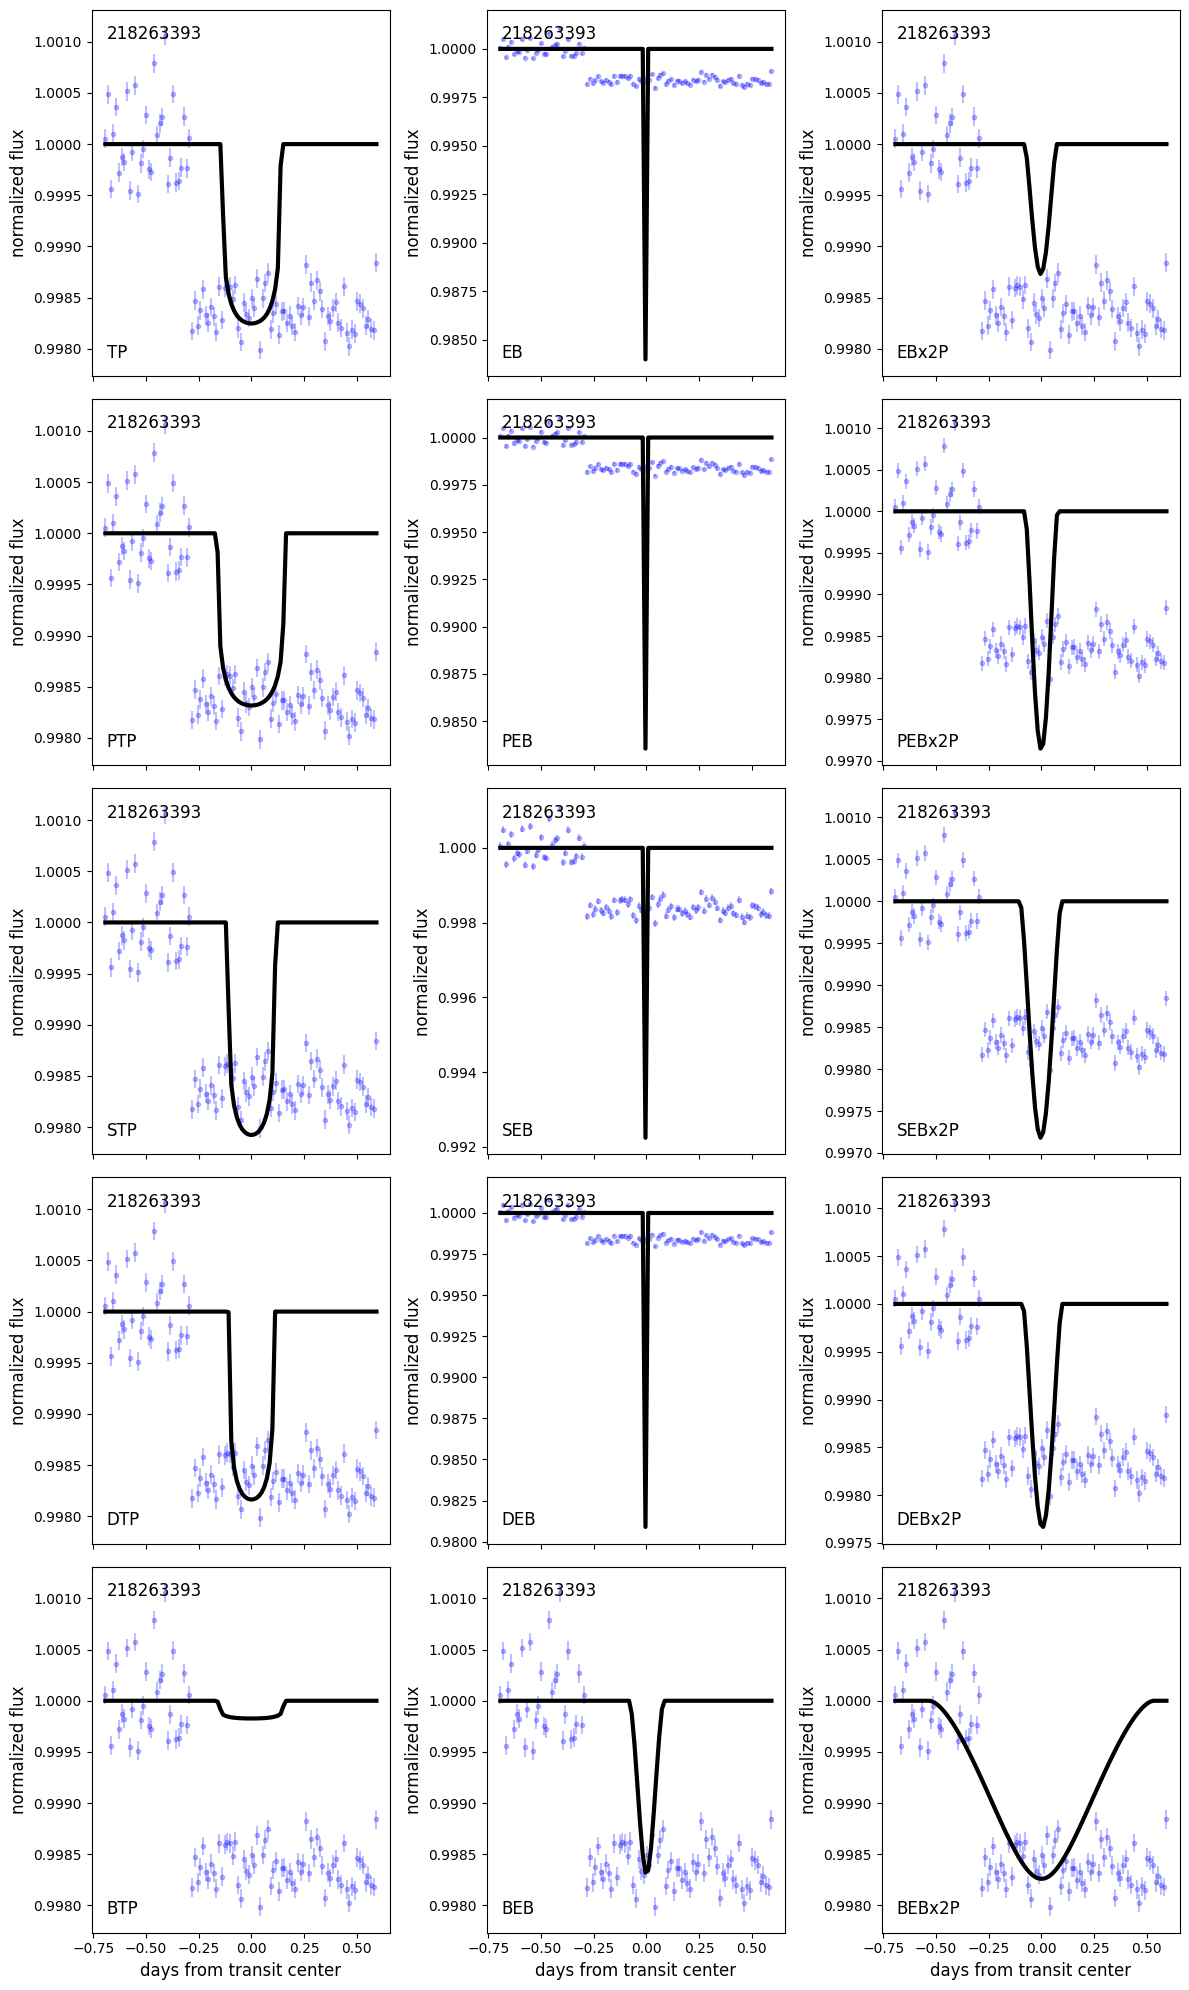

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = nan +/- nan
NFPP = 0.0 +/- 0.0
CPU times: user 14min 21s, sys: 39.7 s, total: 15min
Wall time: 13min 21s


Our final conclusion about this specified planet of TIC 218263393 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).